# Model Assumptions 

In the context of statistical modeling, especially in linear regression, model assumptions refer to the set of conditions that the underlying data and model need to satisfy for the results to be valid and reliable. These assumptions are critical because if they are violated, the estimates obtained from the model may be biased, inefficient, or misleading.

In [43]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [44]:
# Read data

df_auto = pd.read_csv("./data/auto-mpg.csv")
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [45]:
# Read data 
df_ads = pd.read_csv("./data/advertising.csv")
df_ads.drop(labels='Unnamed: 0',axis=1,inplace=True)
df_ads.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9



# 1.Linearity 

    The linearity assumption requires that there is a linear relationship between the response variable (y) and predictor (X). Linear means that the change in y by 1-unit change in X, is constant.



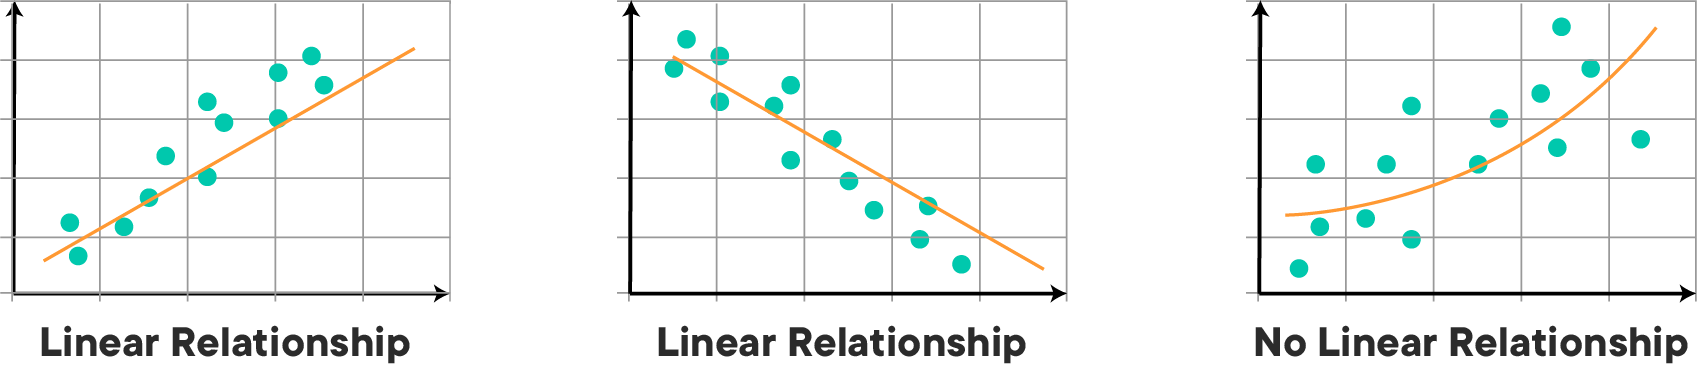

To check for linearity in linear regression, the goal is to determine if the relationship between the independent variables (predictors) and the dependent variable (target) is linear. Here are some common methods to check for linearity

### 1. Scatter Plots

The simplest and most direct method to check for linearity is by visually inspecting scatter plots.
Steps:

    Plot each independent variable (X) against the dependent variable (Y).
    Look for a straight-line pattern in the scatter plot.

<AxesSubplot:xlabel='radio', ylabel='sales'>

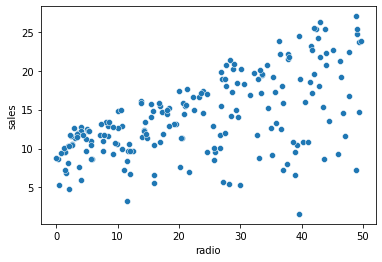

In [46]:
# An Example of a Scatter plot 
X = df_ads['radio']
Y = df_ads['sales']
sns.scatterplot(x=X,y=Y)


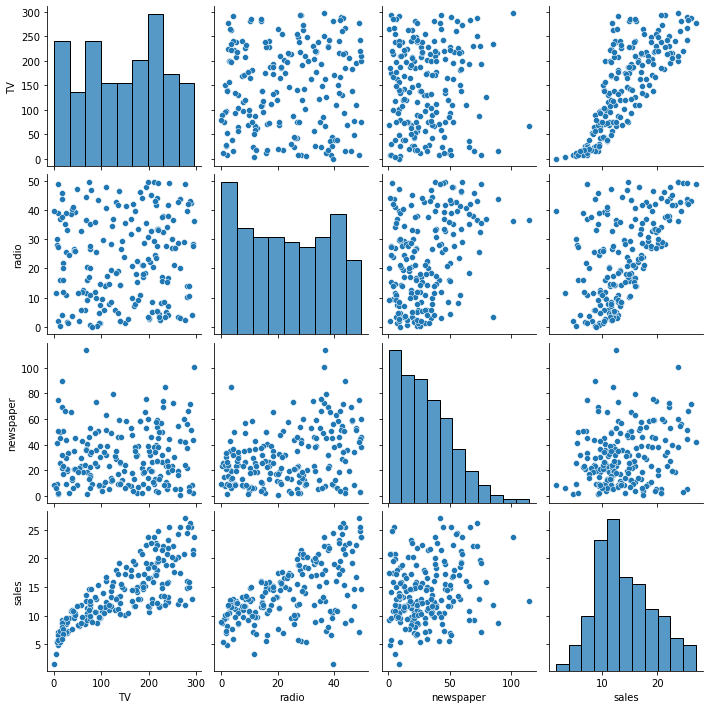

In [47]:
# pairplots (scatter matrix)
sns.pairplot(df_ads) #helps choose features to be used, those that form a linear relationship

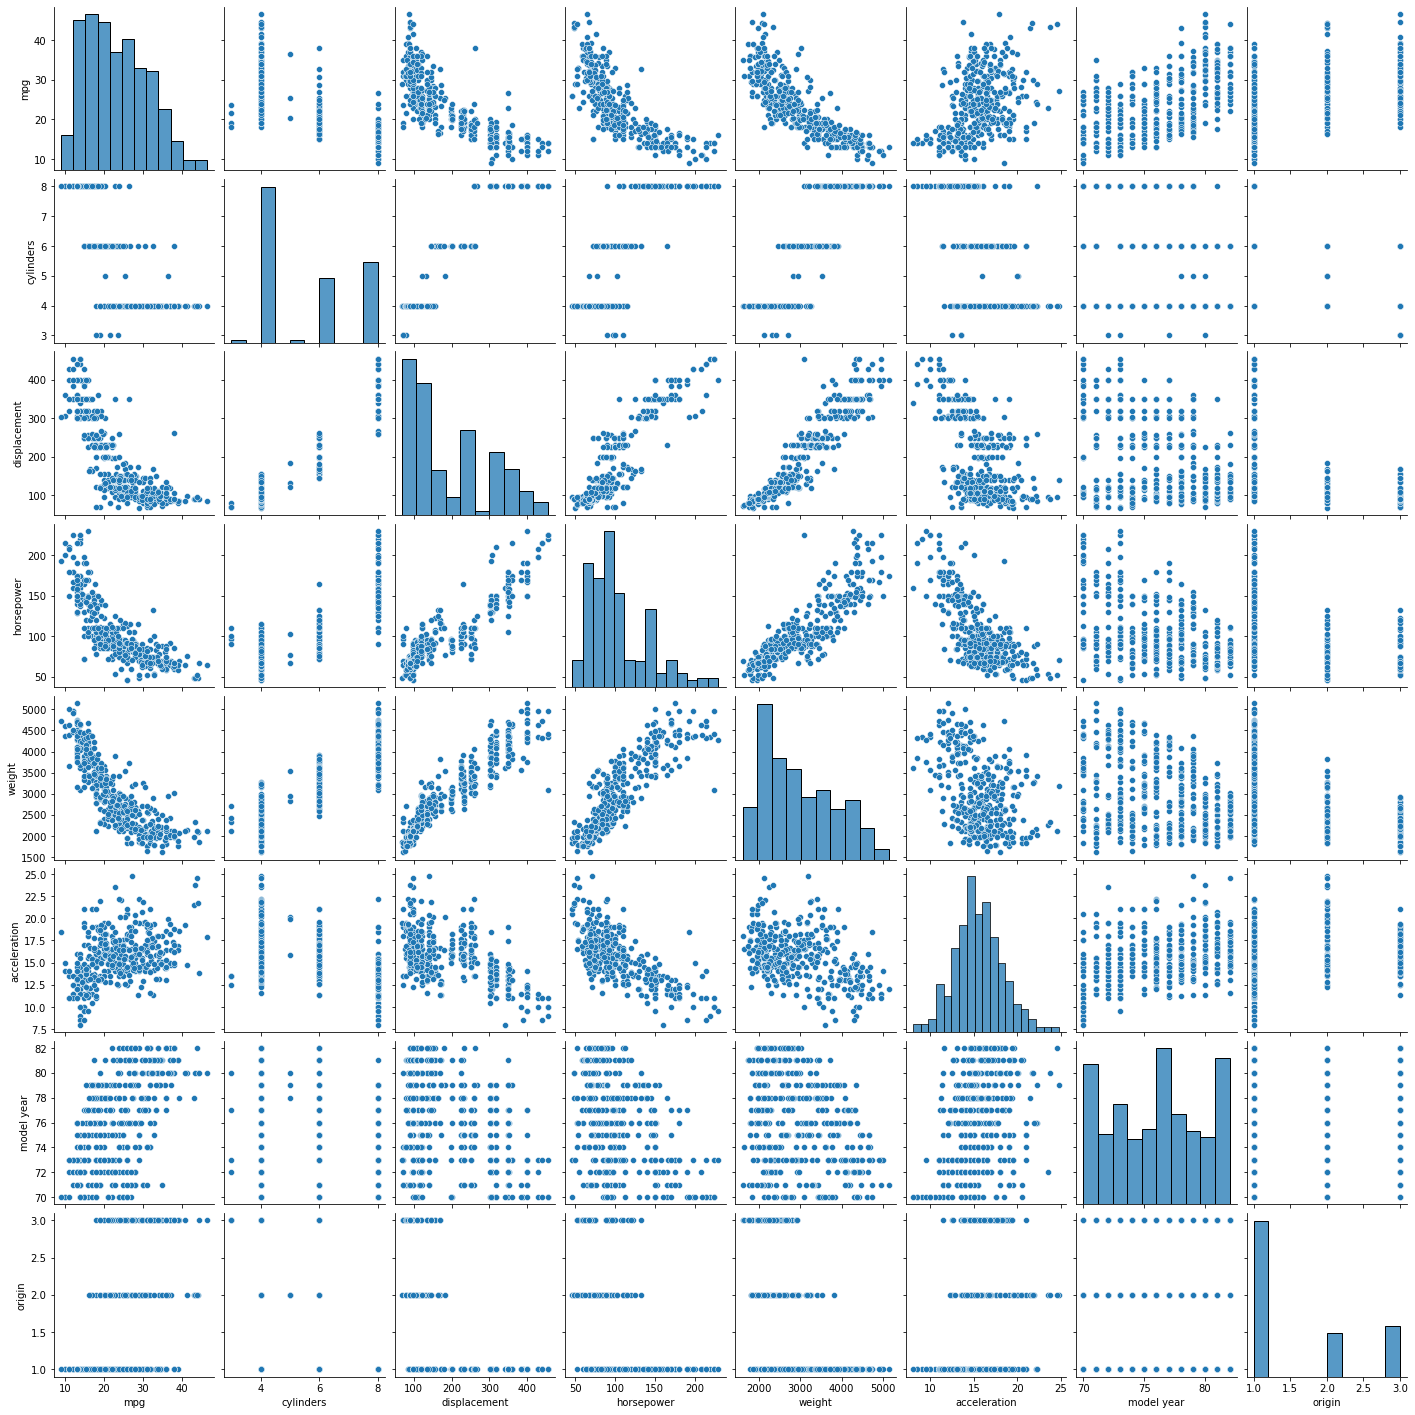

In [48]:
sns.pairplot(df_auto)

### Statistical Testing for Linearity
#### Rainbow Test

The Rainbow Test is a diagnostic test used to check whether a linear regression model is misspecified — specifically, to determine if there are non-linear relationships between the independent variables and the dependent variable that a linear model might fail to capture

#### Rainbow test  Hypothesis:

    The null hypothesis of the Rainbow test is that the linear model is correctly specified (i.e., the relationship between the predictors and the target variable is linear).
    
    The alternative hypothesis is that the linear model is misspecified, and there is a non-linear relationship between the predictors and the dependent variable
    
*If the p-value from the test is small (typically less than 0.05), you reject the null hypothesis*

In [49]:
# build a model
model = sm.OLS(endog=df_auto['horsepower'],exog=sm.add_constant(df_auto['weight']))
#train the model
results = model.fit()
results.summary()

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             horsepower   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.36e-118
Time:                        20:38:50   Log-Likelihood:                -1717.0
No. Observations:                 392   AIC:                             3438.
Df Residuals:                     390   BIC:                             3446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1835      3.570     -3.412      0.001     -19.203      -5.164
weight         0.0392      0.001     33.972      0.000       0.037       0.041
==============================================================================
Omnibus:                       83.255   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.937
Skew:                           0.892   Prob(JB):                     1.11e-68
Kurtosis:                       6.997   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# Ranibow test example 
# returns F-statitisc ,p,valu
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(results)

(1.6926205384023112, 0.00013261023011083687)

## 2. Independence

The independence assumption has two parts:

independence of features and independence of errors.

### Independence of Features

    Independence of features means that we want to avoid collinearity between features in a multiple regression.

Collinearity means that the features can be used to predict each other, which causes numerical problems for the regression algorithm and leads to unstable coefficient

In [51]:
# How to check  for indipedence of features 
df_ads.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

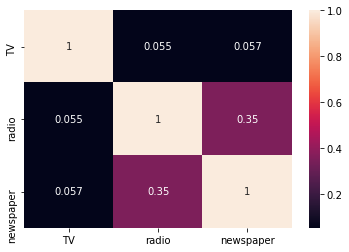

In [52]:
sns.heatmap(df_ads[['TV','radio','newspaper']].corr(),annot=True) #correlation between predictors not allowed

In [53]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<AxesSubplot:>

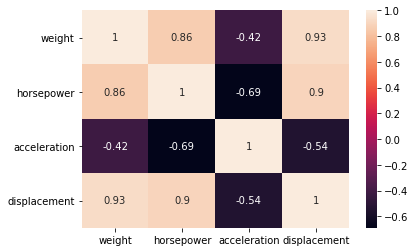

In [54]:
sns.heatmap(df_auto[['weight','horsepower','acceleration','displacement']].corr(),annot=True)#drop those abt .7
#create diff model with each column and check model with better performance
#domain knowldge..in terms of weight and horsepower which affects more i.e fuel galon or (check one with most linear)

In [55]:
# getting the corr


In [56]:
# Heat map for better visualization


### Independence of Errors

    Independence of errors means we want to avoid autocorrelation of errors. Autocorrelation means that a variable is correlated with itself, so that later values can be predicted based on previous values.


## 3. Normality

    The normality assumption states that the model residuals should follow a normal distribution


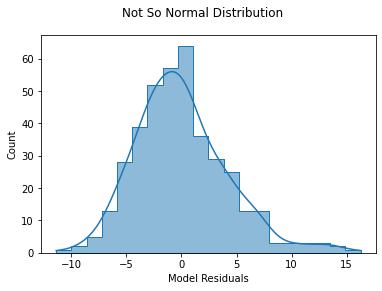

A visual check for normality (above an example of a normal distribution)

<AxesSubplot:ylabel='Density'>

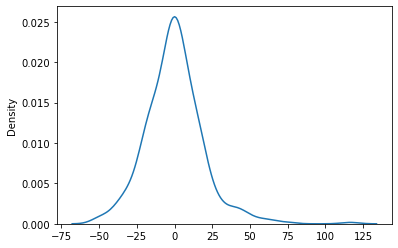

In [57]:
# visual check on the residuals#reisuals are errors
sns.kdeplot(results.resid)


### Statistical Test for normality
#### Jarque-Bera Test

The Jarque-Bera (JB) test is a statistical test used to check whether a dataset follows a normal distribution. Specifically, it tests the null hypothesis that the data comes from a normal distribution by examining two key characteristics:

    Skewness: A measure of the asymmetry of the distribution.
    Kurtosis: A measure of the "tailedness" or the sharpness of the peak of the distribution.

Hypotheses:

    Null Hypothesis (H₀): The data follows a normal distribution.
    Alternative Hypothesis (H₁): The data does not follow a normal distribution.

*If the p-value from the test is small (typically less than 0.05 or 0.01), you reject the null hypothesis and conclude that the data significantly deviates from a normal distribution.*

In [58]:
# Example statistical test 
# Values returned are 

    # JB test statistic
    # The p-value for JB
    # Skew
    # Kurtosis



In [59]:
# print summary


In [60]:
# Other test examples Todo

from statsmodels.stats.diagnostic import kstest_normal
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.stattools import omni_normtest


## 4. Equal Variance: Homoscedasticity

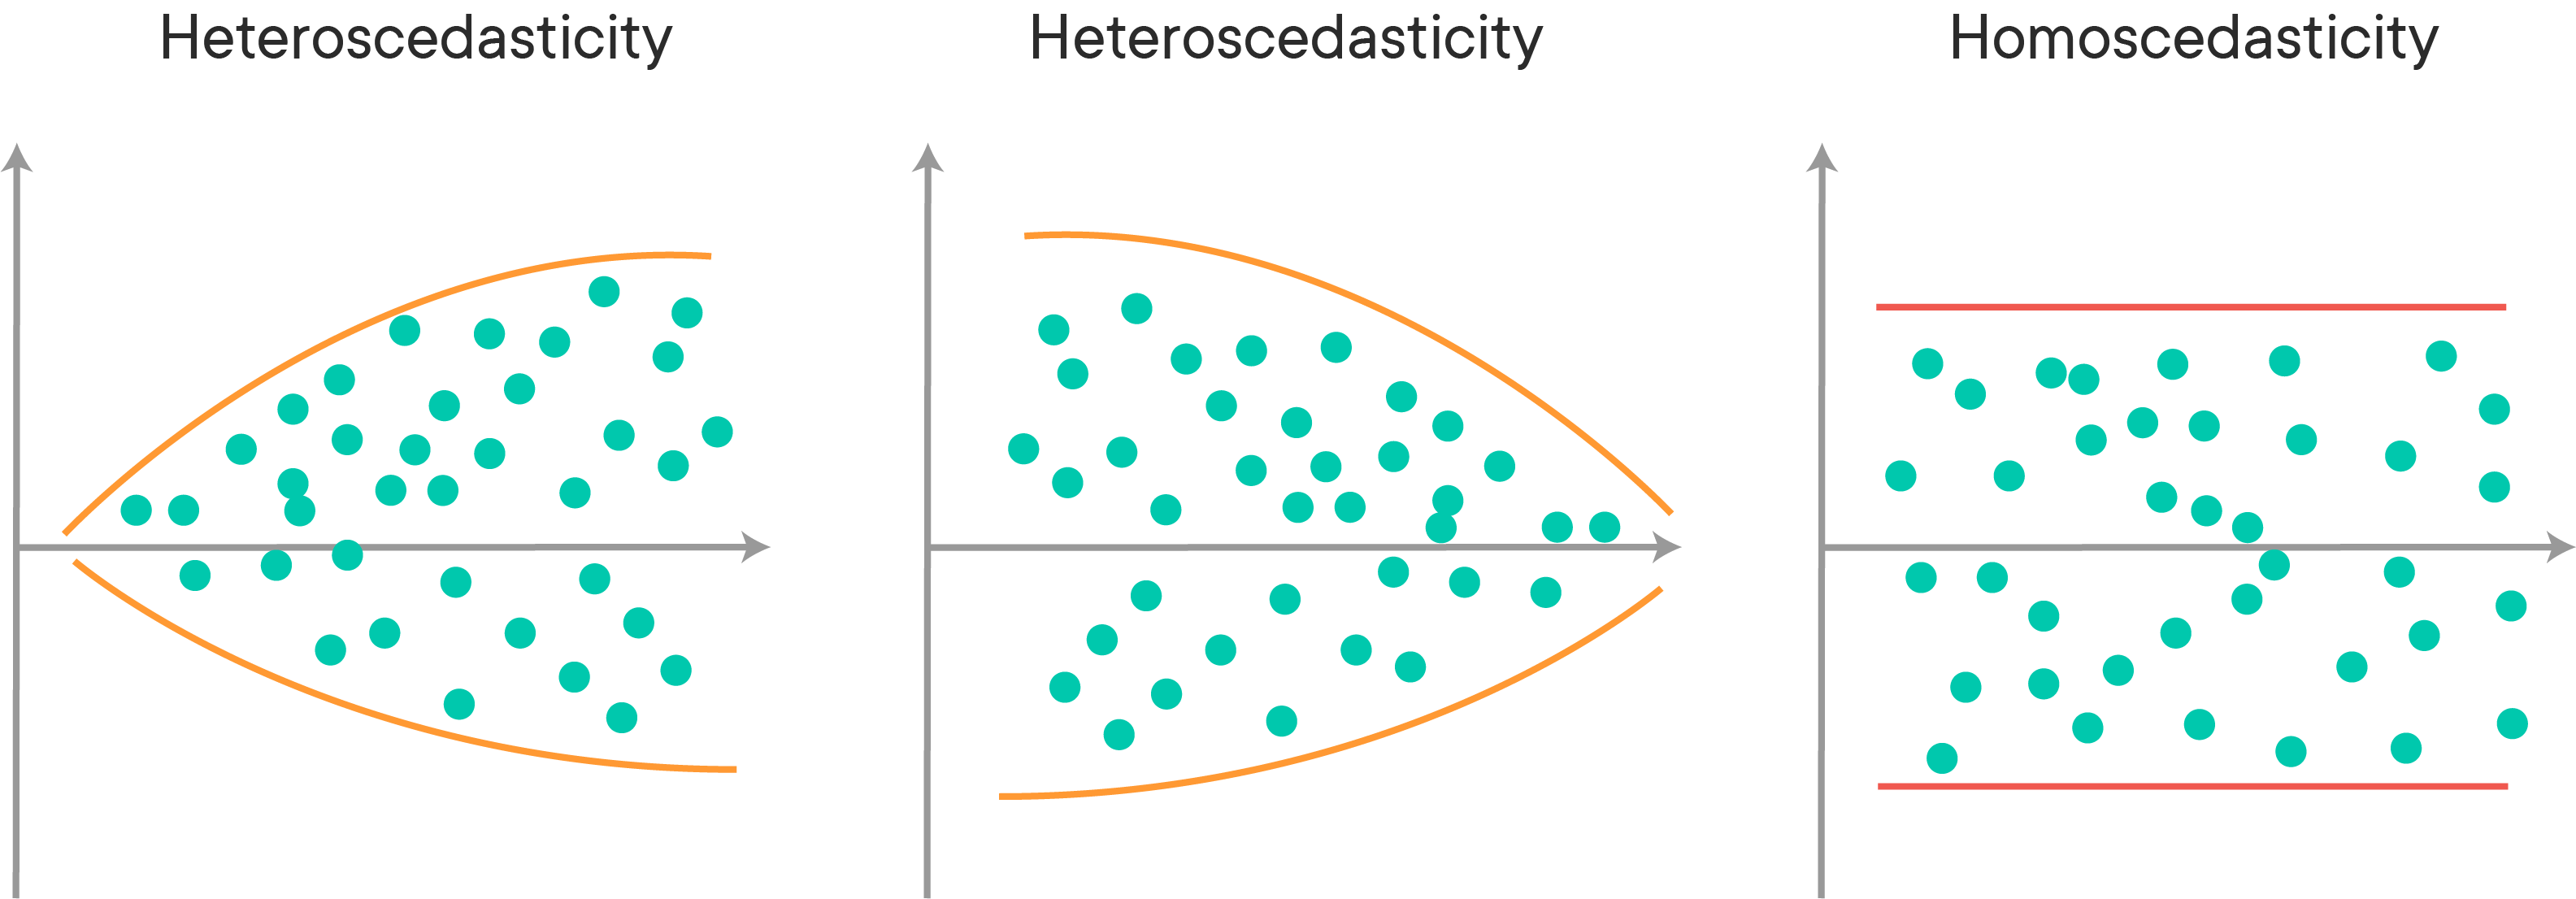

### Statistical test
#### Goldfeld-Quandt test

One popular statistical test for homoscedasticity is the Goldfeld-Quandt test, which divides the dataset into two groups, then finds the MSE of the residuals for each group. The ratio of the second group's mse_resid divided by the first group's mse_resid becomes a statistic that can be compared to the f-distribution to find a p-value.

Null Hypothesis (H₀):

    The variance of the residuals is constant (i.e., the error terms are homoscedastic).
    
Alternative Hypothesis (H₁):

    The variance of the residuals is not constant (i.e., the error terms are heteroscedastic).

*If the p-value from the test is small (typically less than 0.05) reject the null hypothesis*

In [61]:
# out puts 
# Goldfeld-Quandt test statistic
# Goldfeld-Quandt test p-value
# Ordering



## Other tests
 

In [62]:
# Todo

from statsmodels.stats.diagnostic import het_breuschpagan

In [63]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             horsepower   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.36e-118
Time:                        20:40:04   Log-Likelihood:                -1717.0
No. Observations:                 392   AIC:                             3438.
Df Residuals:                     390   BIC:                             3446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1835      3.570     -3.412      0.001     -19.203      -5.164
weight         0.0392      0.001     33.972      0.000       0.037       0.041
==============================================================================
Omnibus:                       83.255   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.937
Skew:                           0.892   Prob(JB):                     1.11e-68
Kurtosis:                       6.997   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""